## Proyecto del Sprint 6 - Análisis y Evaluación de ventas de tienda de videojuegos online
<br>

In [5]:
# Cargar librerías necesarias.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

In [6]:
#Cargar archivo de datos
videogames = pd.read_csv('/datasets/games.csv')

In [7]:
# Información del dataset
videogames.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



In [8]:
# Visualización inicial de datos
videogames.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [9]:
#Verificación de valores de la columna 'Critic_Score'
score_list = list(videogames['Critic_Score'].unique())
print(score_list)


[76.0, nan, 82.0, 80.0, 89.0, 58.0, 87.0, 91.0, 61.0, 97.0, 95.0, 77.0, 88.0, 83.0, 94.0, 93.0, 85.0, 86.0, 98.0, 96.0, 90.0, 84.0, 73.0, 74.0, 78.0, 92.0, 71.0, 72.0, 68.0, 62.0, 49.0, 67.0, 81.0, 66.0, 56.0, 79.0, 70.0, 59.0, 64.0, 75.0, 60.0, 63.0, 69.0, 50.0, 25.0, 42.0, 44.0, 55.0, 48.0, 57.0, 29.0, 47.0, 65.0, 54.0, 20.0, 53.0, 37.0, 38.0, 33.0, 52.0, 30.0, 32.0, 43.0, 45.0, 51.0, 40.0, 46.0, 39.0, 34.0, 35.0, 41.0, 36.0, 28.0, 31.0, 27.0, 26.0, 19.0, 23.0, 24.0, 21.0, 17.0, 22.0, 13.0]


<b>Observaciones</b><br>
1. Cambiar nombres de las columnas usando el formato 'snake_case'
2. Para facilitar el proceso de analisis y búsqueda de duplicados, los valores object de las columnas 'Name', 'Genre' y 'Platform' serán establecidos en minúsculas. 
3. El tipo de dato de la columna 'Year_of_Release' se encuentra establecido como 'float'. Ya que en el proceso de análisis no resulta práctico usar valores fraccionarios para los años, se cambiará a tipo 'int'. 
4. La columna 'Critic_Score' no muestra valores decimales, por lo que se cambiará a tipo 'int'. 
5. Los valores de la columna 'User_score' son de caracter numérico, pero están definidos como tipo 'object'. Sera necesario cambiarlos a tipo 'float'. 

## Corrección de datos

In [10]:
#Renombrar columnas
new_names = []

for old_name in videogames.columns:
    name_stripped = old_name.strip()
    name_lowered = name_stripped.lower()
    name_no_spaces = name_lowered.replace(' ', '_')
    new_names.append(name_no_spaces)

videogames.columns = new_names

videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Columna 'year_of_release' - Conversión y valores nulos 

In [11]:
videogames[videogames['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
#Debido a que obtenemos un error en la conversión de años, tratamos de momento los valores nulos con -1.
# Posteriormente se evaluará si es conveniente establecer otro valor para los valores nulos
videogames['year_of_release'] = videogames['year_of_release'].fillna(-1)

videogames['year_of_release'] = videogames['year_of_release'].astype(int)

<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información con proxys. Por ejemplo en este caso los podríamos completar con los años de lanzamientos de los juegos en otras plataformas
</div>

### Columna 'user_score' - Conversión y valores nulos

In [13]:
# Para evitar errores al realizar la conversión de tipo de datos, definimos valores nulos como -1. 
videogames['user_score'] = videogames['user_score'].fillna(-1)

# Conversión de elementos
videogames['user_score'] = videogames['user_score'].replace('tbd', '-1')
videogames['user_score'] = videogames['user_score'].astype(float)

user_score_values_list = list(videogames['user_score'].unique())
print(user_score_values_list)


[8.0, -1.0, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9.0, 7.9, 8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2, 7.0, 7.3, 4.3, 7.6, 5.7, 5.0, 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1, 6.7, 5.4, 4.0, 4.9, 4.5, 9.3, 6.2, 4.2, 6.0, 3.7, 4.1, 5.8, 5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5, 2.5, 1.9, 3.0, 2.7, 2.2, 2.0, 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0.0, 1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6, 1.4, 0.9, 1.0, 9.7]


### Columna 'critic_score' - Conversión y valores nulos

In [14]:
videogames['critic_score'].fillna(-1, inplace=True)
videogames['critic_score'] = videogames['critic_score'].astype(int)

### Columnas 'name', 'genre' y 'rating' - Valores nulos

In [15]:
column_list_2 = ['name', 'genre', 'rating']

for column in column_list_2: 
    videogames[column] = videogames[column].fillna('unknown')

In [16]:
# Establecer formato de strings para identificar posibles duplicados
column_list_3 = ['name', 'genre', 'platform', 'rating']

for column in column_list_3: 
    videogames[column] = videogames[column].str.lower()
    videogames[column] = videogames[column].str.strip()

In [17]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [18]:
platform_list = list(videogames['platform'].unique())
print(platform_list)

['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba', 'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone', 'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16', '3do', 'gg', 'pcfx']


## Corrección de duplicados

In [19]:
#Conteo inicial de duplicados
videogames.duplicated().sum()

0

In [20]:
videogames[videogames['name'].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,m
35,call of duty: black ops ii,x360,2012,shooter,8.25,4.24,0.07,1.12,83,4.8,m
37,call of duty: modern warfare 3,ps3,2011,shooter,5.54,5.73,0.49,1.57,88,3.2,m
41,call of duty: black ops,ps3,2010,shooter,5.99,4.37,0.48,1.79,88,6.4,m
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m
...,...,...,...,...,...,...,...,...,...,...,...
16706,men in black ii: alien escape,gc,2003,shooter,0.01,0.00,0.00,0.00,-1,-1.0,t
16709,score international baja 1000: the official game,ps2,2008,racing,0.00,0.00,0.00,0.00,-1,-1.0,unknown
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,-1,-1.0,unknown
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,-1,-1.0,unknown


<b>Observaciones: </b>Los nombres de videojuegos duplicados corresponden al mismo juego, pero en plataformas distintas. Identificar un posible duplicado autentico consiste en considerar tanto el nombre, como la plataforma. 

In [21]:
videogames[['name','platform']].duplicated().sum()
videogames[videogames[['name','platform']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,need for speed: most wanted,x360,2005,racing,1.0,0.13,0.02,0.10,83,8.5,t
4127,sonic the hedgehog,ps3,-1,platform,0.0,0.48,0.00,0.00,43,4.1,e10+
11715,need for speed: most wanted,pc,2012,racing,0.0,0.06,0.00,0.02,82,8.5,t
14244,unknown,gen,1993,unknown,0.0,0.00,0.03,0.00,-1,-1.0,unknown
16230,madden nfl 13,ps3,2012,sports,0.0,0.01,0.00,0.00,83,5.5,e


In [22]:
videogames[videogames['name']=='need for speed: most wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,ps2,2005,racing,2.03,1.79,0.08,0.47,82,9.1,t
523,need for speed: most wanted,ps3,2012,racing,0.71,1.46,0.06,0.58,-1,-1.0,unknown
1190,need for speed: most wanted,x360,2012,racing,0.62,0.78,0.01,0.15,83,8.5,t
1591,need for speed: most wanted,x360,2005,racing,1.00,0.13,0.02,0.10,83,8.5,t
1998,need for speed: most wanted,xb,2005,racing,0.53,0.46,0.00,0.05,83,8.8,t
2048,need for speed: most wanted,psv,2012,racing,0.33,0.45,0.01,0.22,-1,-1.0,unknown
3581,need for speed: most wanted,gc,2005,racing,0.43,0.11,0.00,0.02,80,9.1,t
5972,need for speed: most wanted,pc,2005,racing,0.02,0.23,0.00,0.04,82,8.5,t
6273,need for speed: most wanted,wiiu,2013,racing,0.13,0.12,0.00,0.02,-1,-1.0,unknown
6410,need for speed: most wanted,ds,2005,racing,0.24,0.01,0.00,0.02,45,6.1,e


<b>Observaciones: </b>En el caso del videojuego 'Need for speed', observamos que, pese a que comparte nombre y plataforma con un aparente duplicado, tienen distintos años de lanzamiento, por lo que puede tratarse de un relanzamiento: si es así, no puede considerarse un duplicado, por lo que antes de eliminar valores, es recomendable consultar con la empresa si el título es en efecto un duplicado. Considerando estos descubrimientos, evaluaremos ahora los duplicados no explicitos considerando el nombre, la plataforma y el año de lanzamiento. 

In [23]:
videogames[['name','platform','year_of_release']].duplicated().sum()
videogames[videogames[['name','platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,unknown,gen,1993,unknown,0.0,0.00,0.03,0.0,-1,-1.0,unknown
16230,madden nfl 13,ps3,2012,sports,0.0,0.01,0.00,0.0,83,5.5,e


In [24]:
videogames[videogames['name']=='madden nfl 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,madden nfl 13,x360,2012,sports,2.53,0.15,0.0,0.17,81,5.8,e
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83,5.5,e
3986,madden nfl 13,wii,2012,sports,0.47,0.00,0.0,0.03,-1,7.3,e
5887,madden nfl 13,psv,2012,sports,0.28,0.00,0.0,0.02,63,7.3,e
7066,madden nfl 13,wiiu,2012,sports,0.21,0.00,0.0,0.02,75,6.7,e
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83,5.5,e


In [25]:
videogames[videogames['name']=='unknown']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,gen,1993,unknown,1.78,0.53,0.00,0.08,-1,-1.0,unknown
14244,unknown,gen,1993,unknown,0.00,0.00,0.03,0.00,-1,-1.0,unknown


<b>Observaciones: </b> Considerando como criterios de posible duplicidad el nombre, la plataforma y el año de lanzamiento, encontramos dos posibles duplicados: 
1. En el caso del videjuego de nombre desconocido, no podemos determinar si es un duplicado, ya que los valores de ventas son significativamente distintos, por lo que puede tratarse de un videojuego distinto. 
2. Para el caso del titulo 'Madden NFL 13' lanzado en el 2012 para PS3, observamos que los datos de ventas son muy parecidos, a excepción del registro para la columna 'eu_sales', por lo que posiblemente se trata de un registro incompleto o incorrecto, por lo que consideramos eliminarlo para evitar problemas de duplicidad. 

In [26]:
videogames.drop(index=16230, inplace=True)

In [27]:
# Comprobamos que la fila fue eliminada
videogames[videogames['name']=='madden nfl 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,madden nfl 13,x360,2012,sports,2.53,0.15,0.0,0.17,81,5.8,e
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83,5.5,e
3986,madden nfl 13,wii,2012,sports,0.47,0.00,0.0,0.03,-1,7.3,e
5887,madden nfl 13,psv,2012,sports,0.28,0.00,0.0,0.02,63,7.3,e
7066,madden nfl 13,wiiu,2012,sports,0.21,0.00,0.0,0.02,75,6.7,e


In [28]:
# Comprobamos el indice de la fila borrada
videogames.iloc[16230]

name               umineko no naku koro ni portable 1
platform                                          psp
year_of_release                                  2011
genre                                       adventure
na_sales                                          0.0
eu_sales                                          0.0
jp_sales                                         0.01
other_sales                                       0.0
critic_score                                       -1
user_score                                       -1.0
rating                                        unknown
Name: 16231, dtype: object

In [29]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16714 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16714 non-null  int64  
 3   genre            16714 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     16714 non-null  int64  
 9   user_score       16714 non-null  float64
 10  rating           16714 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Ahora enriqueceremos los datos añadiendo una columna de ventas totales para cada título:

In [30]:

def calculate_total_sales(row):
    
    eu_sales = row['eu_sales']
    na_sales = row['na_sales']
    jp_sales = row['jp_sales']
    other_sales = row['other_sales']
    
    total_sales = eu_sales + na_sales + jp_sales + other_sales
    
    return total_sales
    

In [31]:
videogames['total_sales'] = videogames.apply(calculate_total_sales, axis=1)

In [32]:
#Comprobamos la columna añadida
videogames.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,-1,-1.0,unknown,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87,8.4,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,-1,-1.0,unknown,28.31


Corrección de valor de año de lanzamiento equivocado en un juego de la consola Nintendo DS:

In [33]:
videogames[(videogames['platform']=='ds') & (videogames['year_of_release']==1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,action,0.0,0.0,0.02,0.0,-1,-1.0,unknown,0.02


In [34]:
#Asignamos temporalmente el valor por defecto para años desconocidos
videogames.loc[15957,'year_of_release'] = -1
videogames.loc[15957,'year_of_release']

-1

In [35]:
videogames[videogames['year_of_release']==-1]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,madden nfl 2004,ps2,-1,sports,4.26,0.26,0.01,0.71,94,8.5,e,5.24
377,fifa soccer 2004,ps2,-1,sports,0.59,2.36,0.04,0.51,84,6.4,e,3.50
456,lego batman: the videogame,wii,-1,action,1.80,0.97,0.00,0.29,74,7.9,e10+,3.06
475,wwe smackdown vs. raw 2006,ps2,-1,fighting,1.57,1.02,0.00,0.41,-1,-1.0,unknown,3.00
609,space invaders,2600,-1,shooter,2.36,0.14,0.00,0.03,-1,-1.0,unknown,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,-1,sports,0.01,0.00,0.00,0.00,43,-1.0,e10+,0.01
16405,freaky flyers,gc,-1,racing,0.01,0.00,0.00,0.00,69,6.5,t,0.01
16448,inversion,pc,-1,shooter,0.01,0.00,0.00,0.00,59,6.7,m,0.01
16458,hakuouki: shinsengumi kitan,ps3,-1,adventure,0.01,0.00,0.00,0.00,-1,-1.0,unknown,0.01


De esta forma concluimos el proceso de preparación de datos. Sin embargo, en una proxima iteración del proyecto, debemos considerar usar valores numéricos congruentes con la información para rellenar los datos nulos. Para poder obtener estos datos, deberemos evaluar la presencia de valores atípicos. 

##### Asignación de años faltantes

<b> Corrección de valores nulos para la columna de año de lanzamiento</b><br>
La primera iteración del proyecto nos permitió observar que, en lo que respecta a los años registrados para cada consola, estos se encuentran acotados en un periodo determinado. Esto significa que, pese a que desde luego existen años que presentan un mayor número de titulos lanzados que otros, no se presentaran datos atípicos por la misma naturaleza de los periodos comprendidos entre años. Esta hipotesis se sustenta tambien en el hecho de que la media y la mediana de los años de lanzamiento para cada consola suele ser semejante. <br>
Considerando las observaciones obtenidas, se manejaran los datos faltantes de la columna 'year_of_release' asignando el año promedio de lanzamiento para cada consola. 

In [36]:
def round_value(x):
    value = np.ceil(x)
    return value

years_group = videogames[videogames['year_of_release']!=-1].groupby('platform')

agg_dict_2 = {'year_of_release':['mean','median']}
years_by_platform = years_group.agg(agg_dict_2).reset_index()
years_by_platform[('year_of_release','mean')] = years_by_platform[('year_of_release','mean')].apply(round_value).astype(int)
years_by_platform[('year_of_release','median')] = years_by_platform[('year_of_release','median')].astype(int)

platform_list = list(years_by_platform['platform'])
years_mean_list = list(years_by_platform[('year_of_release','mean')])

mean_years_platform_list = [platform_list, years_mean_list]
mean_year_dict = {}

for x in range(0,len(mean_years_platform_list[0])):
    mean_year_dict[mean_years_platform_list[0][x]] = mean_years_platform_list[1][x]
    
print(mean_year_dict)
years_by_platform

{'2600': 1983, '3do': 1995, '3ds': 2014, 'dc': 2000, 'ds': 2009, 'gb': 1996, 'gba': 2004, 'gc': 2004, 'gen': 1994, 'gg': 1992, 'n64': 1999, 'nes': 1988, 'ng': 1995, 'pc': 2009, 'pcfx': 1996, 'ps': 1999, 'ps2': 2005, 'ps3': 2011, 'ps4': 2016, 'psp': 2009, 'psv': 2015, 'sat': 1997, 'scd': 1994, 'snes': 1994, 'tg16': 1995, 'wii': 2009, 'wiiu': 2014, 'ws': 2000, 'x360': 2010, 'xb': 2004, 'xone': 2015}


platform year_of_release       
                       mean median
0      2600            1983   1982
1       3do            1995   1995
2       3ds            2014   2013
3        dc            2000   2000
4        ds            2009   2008
5        gb            1996   1997
6       gba            2004   2003
7        gc            2004   2003
8       gen            1994   1993
9        gg            1992   1992
10      n64            1999   1999
11      nes            1988   1986
12       ng            1995   1994
13       pc            2009   2010
14     pcfx            1996   1996
15       ps            1999   1998
16      ps2            2005   2005
17      ps3            2011   2011
18      ps4            2016   2015
19      psp            2009   2009
20      psv            2015   2014
21      sat            1997   1996
22      scd            1994   1994
23     snes            1994   1994
24     tg16            1995   1995
25      wii            2009   2009
26     wiiu            2014   2013
27       ws            2000   2000
28     x360            2010   2010
29       xb            2004   2004
30     xone            2015   2015

In [37]:
# Conteo de videojuegos por plataforma con año de lanzamiento desconocido. 
videogames[videogames['year_of_release']==-1].groupby('platform')['name'].count().reset_index()

,platform,name
0,2600,17
1,3ds,8
2,ds,31
3,gb,1
4,gba,11
5,gc,14
6,n64,3
7,pc,17
8,ps,7
9,ps2,34


In [38]:
def set_release_year(row): 
    
    year_dictionary = {'2600': 1983, '3do': 1995, '3ds': 2014, 'dc': 2000, 'ds': 2009, 'gb': 1996, 'gba': 2004, 'gc': 2004,
     'gen': 1994, 'gg': 1992, 'n64': 1999, 'nes': 1988, 'ng': 1995, 'pc': 2009, 'pcfx': 1996, 'ps': 1999,
     'ps2': 2005, 'ps3': 2011, 'ps4': 2016, 'psp': 2009, 'psv': 2015, 'sat': 1997, 'scd': 1994, 'snes': 1994,
     'tg16': 1995, 'wii': 2009, 'wiiu': 2014, 'ws': 2000, 'x360': 2010, 'xb': 2004, 'xone': 2015}
    
    if row['year_of_release'] == -1:
        year = year_dictionary[row['platform']]
    
    else:
        year = row['year_of_release']
            
    return year

In [39]:
videogames['year_of_release'] = videogames.apply(set_release_year, axis=1)
videogames[videogames['year_of_release']==-1]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


## Análisis de Datos

### Lanzamientos de juegos por año
Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

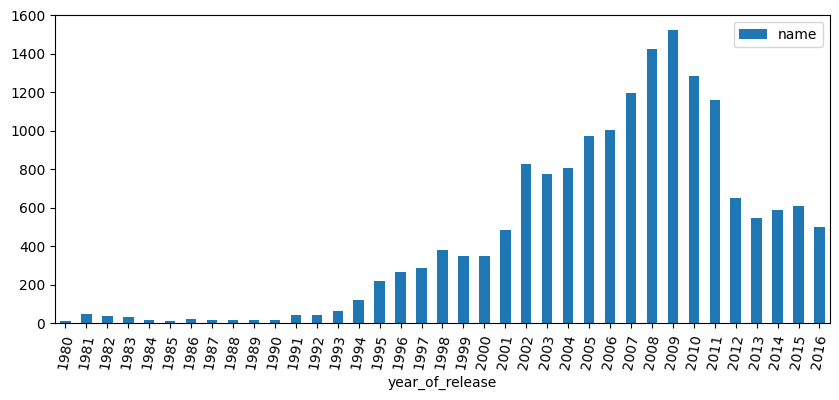

In [40]:
titles_by_year = videogames.groupby('year_of_release')['name'].count().reset_index()
titles_by_year.plot(x='year_of_release', kind = 'bar', rot = 80, figsize=(10,4))
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica, esta gráfica nos ayuda a entender también sobre el comportamiento del mercado de videojuegos en el tiempo
</div>

In [41]:
platforms_list = list(videogames['platform'].unique())
print(platforms_list)

['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba', 'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone', 'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16', '3do', 'gg', 'pcfx']


<b>Observaciones: </b> El periodo comprendido entre los años 2005 y 2011 es en el que se presentó un mayor número de lanzamientos de títulos de videojuegos. Después de dicho periodo se observa una tendencia más reducida, pero estable. 

### Ventas entre plataformas y periodos de popularidad
Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [42]:
sales_by_year = videogames.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
sales_by_year

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,16.34
4,2600,1984,0.27
...,...,...,...
232,xb,2008,0.18
233,xone,2013,18.96
234,xone,2014,54.07
235,xone,2015,60.14


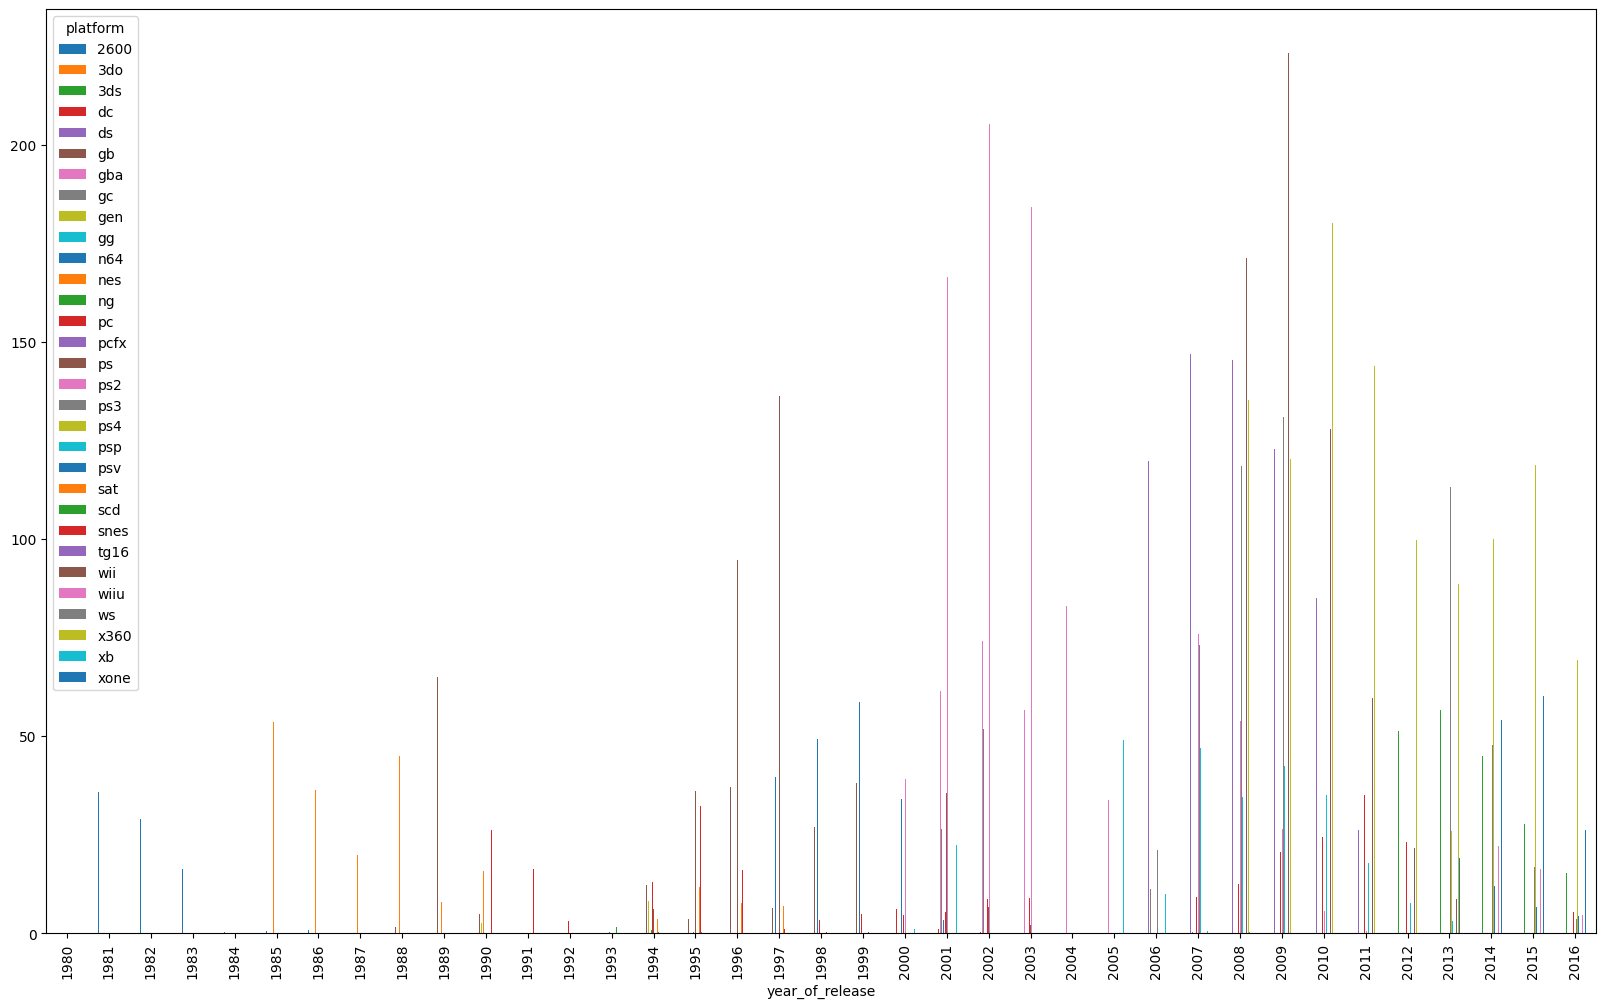

In [43]:
sales_by_year_pivot = videogames.pivot_table(index='year_of_release',
                                             columns='platform',
                                             values='total_sales',
                                             aggfunc='sum')

sales_by_year_platform = sales_by_year_pivot.loc[1980:].reset_index()
sales_by_year_platform.fillna(0, inplace=True)
sales_by_year_platform.plot(kind='bar', x='year_of_release', figsize=(20,12))
plt.show()

<b>Observaciones: </b> La gráfica generada no nos permite obtener información útil respecto a los periodos de popularidad y ventas por año por plataforma. Será necesario filtrar la información de manera que resulte accesible. 

In [44]:
#agg_dict_1 = {'total_sales':'sum', 'year_of_release':['min','max']}
agg_dict_1 = {'total_sales':'sum', 'year_of_release':'max'}
grp_1 = videogames.groupby('platform')
videogames_fact1 = grp_1.agg(agg_dict_1).reset_index()
videogames_fact1

,platform,total_sales,year_of_release
0,2600,96.98,1989
1,3do,0.10,1995
2,3ds,259.00,2016
3,dc,15.95,2008
4,ds,806.12,2013
5,gb,255.46,2001
6,gba,317.85,2007
7,gc,198.93,2007
8,gen,30.77,1994
9,gg,0.04,1992


In [45]:
min_year_platform = videogames[videogames['year_of_release']!=-1].groupby('platform')['year_of_release'].min().reset_index()
min_year_platform

,platform,year_of_release
0,2600,1980
1,3do,1994
2,3ds,2011
3,dc,1998
4,ds,2004
5,gb,1988
6,gba,2000
7,gc,2001
8,gen,1990
9,gg,1992


In [46]:
videogames_fact1 = videogames_fact1.merge(min_year_platform, on='platform')
videogames_fact1

,platform,total_sales,year_of_release_x,year_of_release_y
0,2600,96.98,1989,1980
1,3do,0.10,1995,1994
2,3ds,259.00,2016,2011
3,dc,15.95,2008,1998
4,ds,806.12,2013,2004
5,gb,255.46,2001,1988
6,gba,317.85,2007,2000
7,gc,198.93,2007,2001
8,gen,30.77,1994,1990
9,gg,0.04,1992,1992


In [47]:
videogames_fact1['first_year'] = videogames_fact1['year_of_release_y']
videogames_fact1['last_year'] = videogames_fact1['year_of_release_x']
videogames_fact1 = videogames_fact1.drop(columns=['year_of_release_y','year_of_release_x'])
videogames_fact1['years_period'] = videogames_fact1['last_year'] - videogames_fact1['first_year']
videogames_fact1

,platform,total_sales,first_year,last_year,years_period
0,2600,96.98,1980,1989,9
1,3do,0.10,1994,1995,1
2,3ds,259.00,2011,2016,5
3,dc,15.95,1998,2008,10
4,ds,806.12,2004,2013,9
5,gb,255.46,1988,2001,13
6,gba,317.85,2000,2007,7
7,gc,198.93,2001,2007,6
8,gen,30.77,1990,1994,4
9,gg,0.04,1992,1992,0


In [48]:
print('Duración promedio de consolas en el mercado: ',videogames_fact1['years_period'].mean())
print('Mediana de la duración: ',videogames_fact1['years_period'].median())

Duración promedio de consolas en el mercado:  7.0
Mediana de la duración:  6.0


In [49]:
sorted_platforms = videogames_fact1.sort_values(by='total_sales', ascending=False).reset_index().drop(columns='index')
sorted_platforms

,platform,total_sales,first_year,last_year,years_period
0,ps2,1255.77,2000,2011,11
1,x360,971.42,2005,2016,11
2,ps3,939.64,2006,2016,10
3,wii,907.51,2006,2016,10
4,ds,806.12,2004,2013,9
5,ps,730.86,1994,2003,9
6,gba,317.85,2000,2007,7
7,ps4,314.14,2013,2016,3
8,psp,294.05,2004,2015,11
9,pc,259.52,1985,2016,31


Para obtener un promedio fiable del periodo de años en el que una consola cuenta con ventas significativas, debemos considerar dos factores importantes con base a la ultima tabla obtenida:
1. Consideramos ventas superiores a los 90 millones.
2. Omitiremos consolas que han sido recientemente lanzadas (relativamente), ya que es de suponerse que su periodo de ventas aún se encuentra desarrollándose. Establecemos como filtro el año 2010, por lo que toda consola lanzada después de este año no será considerada.

In [50]:
sorted_platforms.query("total_sales > 90 and first_year < 2010")

,platform,total_sales,first_year,last_year,years_period
0,ps2,1255.77,2000,2011,11
1,x360,971.42,2005,2016,11
2,ps3,939.64,2006,2016,10
3,wii,907.51,2006,2016,10
4,ds,806.12,2004,2013,9
5,ps,730.86,1994,2003,9
6,gba,317.85,2000,2007,7
8,psp,294.05,2004,2015,11
9,pc,259.52,1985,2016,31
11,xb,257.74,2000,2008,8


In [51]:
sorted_platforms.query("total_sales > 90 and first_year < 2010")['years_period'].mean()
sorted_platforms.query("total_sales > 90 and first_year < 2010")['years_period'].median()

9.5

In [52]:
sorted_platforms.query("total_sales > 90 and 1990 <= first_year < 2010")

,platform,total_sales,first_year,last_year,years_period
0,ps2,1255.77,2000,2011,11
1,x360,971.42,2005,2016,11
2,ps3,939.64,2006,2016,10
3,wii,907.51,2006,2016,10
4,ds,806.12,2004,2013,9
5,ps,730.86,1994,2003,9
6,gba,317.85,2000,2007,7
8,psp,294.05,2004,2015,11
11,xb,257.74,2000,2008,8
14,n64,218.68,1996,2002,6


El siguiente filtro nos permite obtener el top 5 de consolas con ventas más elevadas. Observaremos los patrones de ventas de las consolas más exitosas para intentar desarrollar una hipotesis general respecto a sus periodos de popularidad, así como de sus lapsos de mayor éxito.  

In [53]:
#Reduciendo los criterios de plataformas para los últimos años
study_platform_list = list(sorted_platforms.query("total_sales > 800 and 2000 <= first_year < 2010")['platform'])
study_platform_list

['ps2', 'x360', 'ps3', 'wii', 'ds']

In [54]:
top_platform = videogames[videogames['platform'].isin(study_platform_list)]

top_platform_pivot = top_platform.pivot_table(index='year_of_release',
                         columns='platform',
                         values='total_sales',
                         aggfunc='sum')

top_platform_pivot

platform,ds,ps2,ps3,wii,x360
year_of_release,,,,,
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,182.87,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41
2008,145.31,53.90,118.52,171.32,135.26


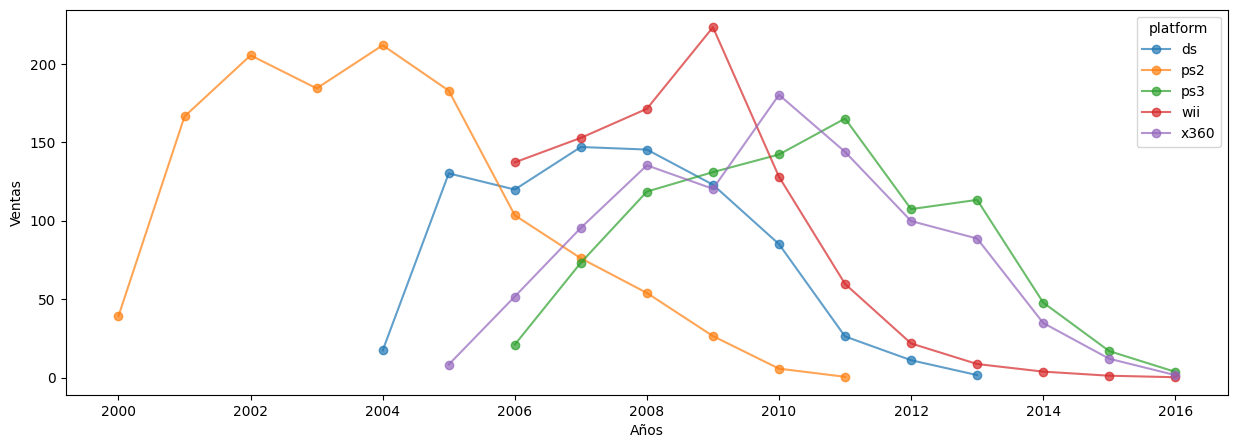

In [55]:
top_platform_graf = top_platform_pivot.loc[2000:].reset_index()
#top_platform_graf.fillna(0, inplace=True)
top_platform_graf.plot(x='year_of_release', figsize=(15,5), alpha=0.7, style='o-', xlabel='Años', ylabel='Ventas')
plt.show()

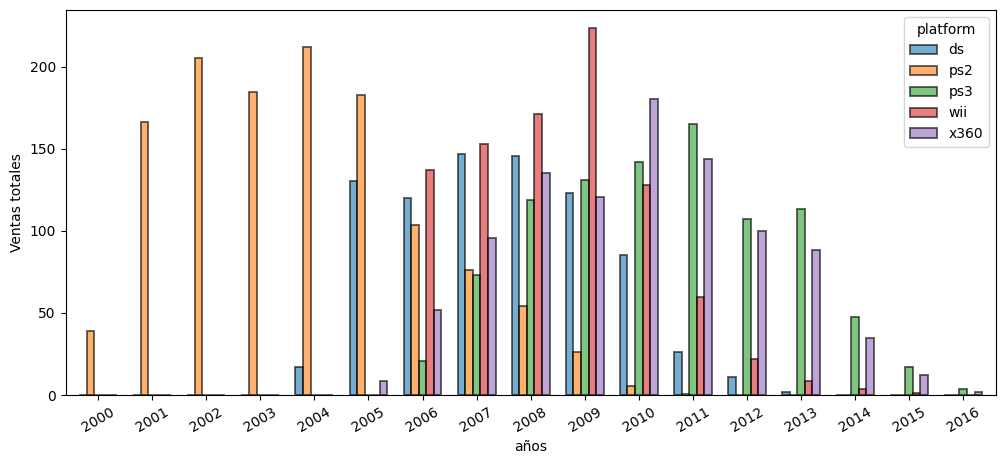

In [56]:
top_platform_graf = top_platform_pivot.loc[2000:].reset_index()
#top_platform_graf.fillna(0, inplace=True)
top_platform_graf.plot(x='year_of_release',
                       kind='bar',
                       width=0.7, 
                       figsize=(12,5),
                       alpha=0.6,
                       edgecolor='black',
                       linewidth=1.4,
                       xlabel = 'años',
                       ylabel = 'Ventas totales',
                       rot=30)
plt.show()

#### Observaciones
1. Con base en las observaciones obtenidas, es posible inferir que el periodo de popularidad de una consola comprende cerca de 10 años (9.5 de acuerdo al promedio considerado). En dicho periodo, la consola en cuestión cuenta con ventas significativas de títulos exitosos. 
2. Generalmente, parece observarse que el año en que una consola registra su mayor volumen de ventas corresponde al cuarto o quinto año desde su aparición en las listas de popularidad. Intentaremos sustentar este posible patrón a continuación. 


In [57]:
#sorted_platforms
#videogames.groupby('platform')
best_year_1 = sales_by_year.groupby('platform')['total_sales'].max().reset_index()


In [58]:
best_year_1 = best_year_1.merge(sales_by_year, how='left', on=['platform', 'total_sales'])
best_year_1

,platform,total_sales,year_of_release
0,2600,35.68,1981
1,3do,0.08,1995
2,3ds,63.20,2011
3,dc,5.99,2000
4,ds,146.94,2007
5,gb,64.97,1989
6,gba,82.88,2004
7,gc,51.81,2002
8,gen,12.64,1992
9,gg,0.04,1992


In [59]:
best_year_platform = best_year_1.rename(columns={'year_of_release':'best_year','total_sales':'best_year_sales'})
best_year_platform

,platform,best_year_sales,best_year
0,2600,35.68,1981
1,3do,0.08,1995
2,3ds,63.20,2011
3,dc,5.99,2000
4,ds,146.94,2007
5,gb,64.97,1989
6,gba,82.88,2004
7,gc,51.81,2002
8,gen,12.64,1992
9,gg,0.04,1992


In [60]:
videogames_fact_table_1 = sorted_platforms.merge(best_year_platform, on='platform')
videogames_fact_table_1

,platform,total_sales,first_year,last_year,years_period,best_year_sales,best_year
0,ps2,1255.77,2000,2011,11,211.81,2004
1,x360,971.42,2005,2016,11,180.21,2010
2,ps3,939.64,2006,2016,10,165.09,2011
3,wii,907.51,2006,2016,10,223.30,2009
4,ds,806.12,2004,2013,9,146.94,2007
5,ps,730.86,1994,2003,9,169.49,1998
6,gba,317.85,2000,2007,7,82.88,2004
7,ps4,314.14,2013,2016,3,118.90,2015
8,psp,294.05,2004,2015,11,55.32,2006
9,pc,259.52,1985,2016,31,35.03,2011


In [61]:
videogames_fact_table_1['years_for_best_sales'] = videogames_fact_table_1['best_year'] - videogames_fact_table_1['first_year']
videogames_fact_table_1

,platform,total_sales,first_year,last_year,years_period,best_year_sales,best_year,years_for_best_sales
0,ps2,1255.77,2000,2011,11,211.81,2004,4
1,x360,971.42,2005,2016,11,180.21,2010,5
2,ps3,939.64,2006,2016,10,165.09,2011,5
3,wii,907.51,2006,2016,10,223.30,2009,3
4,ds,806.12,2004,2013,9,146.94,2007,3
5,ps,730.86,1994,2003,9,169.49,1998,4
6,gba,317.85,2000,2007,7,82.88,2004,4
7,ps4,314.14,2013,2016,3,118.90,2015,2
8,psp,294.05,2004,2015,11,55.32,2006,2
9,pc,259.52,1985,2016,31,35.03,2011,26


#### Observaciones
La tabla obtenida nos permite consultar información interesante respecto a las consolas y su desarrollo dentro del mercado. Esta tabla incluye datos como los años trasncurridos desde su aparición, su mejor año de ventas y los años que han transcurrido hasta llegar a su mejor periodo de éxito. Nos basaremos en esta tabla para fundamentar el análisis correspondiente a las sugerencias de consolas potencialmente rentables en el año 2016 y posteriores. 


Continuando con el desarrollo del análisis, realizamos una selección de consolas presentes en el mercado desde el año 2010. 

In [62]:
#Selección de consolas lanzadas después del año 2010
current_platforms_list_1 = list(videogames_fact_table_1[videogames_fact_table_1['first_year']>=2010]['platform'])
current_platforms_list_1

['ps4', '3ds', 'xone', 'wiiu', 'psv']

In [63]:
current_platforms = videogames[videogames['platform'].isin(current_platforms_list_1)]

current_platforms_pivot = current_platforms.pivot_table(index='year_of_release',
                         columns='platform',
                         values='total_sales',
                         aggfunc='sum')

current_platforms_pivot

platform,3ds,ps4,psv,wiiu,xone
year_of_release,,,,,
2011,63.20,NaN,4.63,NaN,NaN
2012,51.36,NaN,16.19,17.56,NaN
2013,56.57,25.99,10.59,21.65,18.96
2014,44.95,100.00,11.90,22.03,54.07
2015,27.78,118.90,6.51,16.35,60.14
2016,15.14,69.25,4.25,4.60,26.15


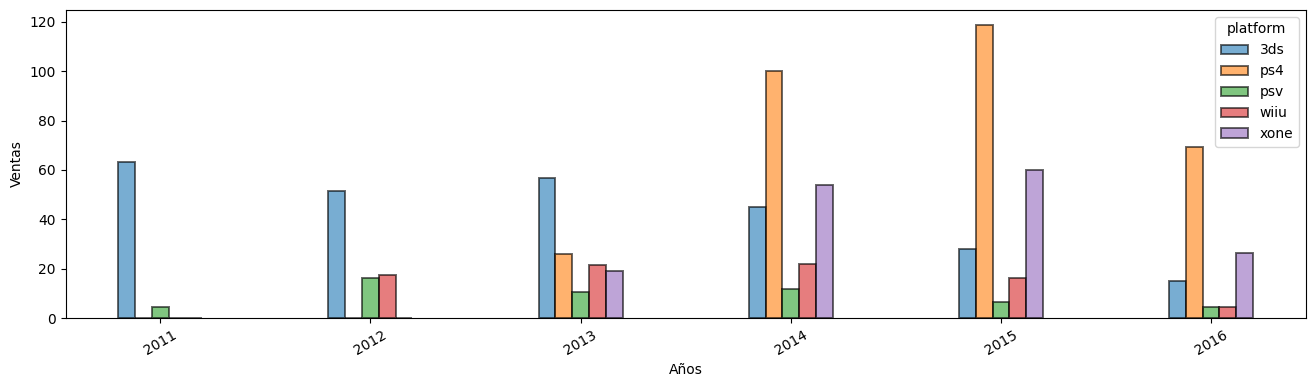

In [64]:
current_platforms_graph = current_platforms_pivot.loc[2010:].reset_index()
current_platforms_graph.plot(x='year_of_release',
                       kind='bar',
                       width=0.4, 
                       figsize=(16,4),
                       alpha=0.6,
                       edgecolor='black',
                       linewidth=1.4,
                       rot=30, xlabel='Años', ylabel='Ventas')
plt.show()

#### Observaciones
Antes de determinar las consolas sugeridas para futuras campañas, en la información del proyecto se nos notifica que los datos del 2016 pueden estar incompletos, por lo que podemos considerar que las consolas aún presentes en este año pueden tener ventas más elevadas de las registradas en el análisis. Teniendo esto en cuenta, podemos considerar las siguientes plataformas: 
1. La consola PS4 comenzó a registrar ventas significativas desde el año 2013. Nuestro análisis nos sugiere que el mejor periodo de ventas para una plataforma parece corresponder al 4 o 5 año después de su lanzamiento y/o registro de títulos exitosos, por lo que la PS4 es una opción recomendable. 
2. Por otra parte, el Xbox One presenta una situación semejante a la del PS4, ya que vemos que también fue lanzada en el año 2013, por lo que se espera que su periodo de mayor presencia este por comenzar. 
3. Las consolas de Nintendo, que corresponden a la 3DS y la Wii U), fueron recientemente lanzadas (en el 2011 y el 2013, respectivamente). Sin embargo, pese a que poseen presencia de titulos exitosos, no ha sido tan elevada como la registrada para las consolas Xbox One o la PS4, ademas de mostrar una tendencia de ventas que parece comenzar a disminuir. 

<br>Ya que hemos verificado cuales consolas recientemente lanzadas aparentan ser rentables en los próximos años, sería conveniente analizar si alguna consola lanzada en el periodo anterior al año 2010 aún posee presencia considerable en el mercado. 

In [65]:
# Selección de consolas con ventas aún registradas en el año 2015 y 2016
current_platforms_list_2 = list(videogames_fact_table_1[videogames_fact_table_1['last_year']>=2015]['platform'])
for platform in current_platforms_list_1:
        current_platforms_list_2.remove(platform)
current_platforms_list_2

['x360', 'ps3', 'wii', 'psp', 'pc']

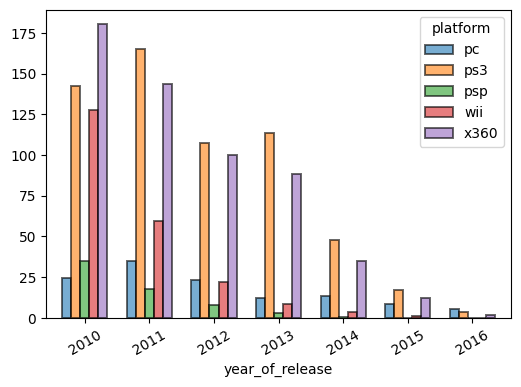

In [66]:
current_platforms_2 = videogames[videogames['platform'].isin(current_platforms_list_2)]

current_platforms_2_pivot = current_platforms_2.pivot_table(index='year_of_release',
                         columns='platform',
                         values='total_sales',
                         aggfunc='sum')


current_platforms_graph_2 = current_platforms_2_pivot.loc[2010:].reset_index()
current_platforms_graph_2.plot(x='year_of_release',
                       kind='bar',
                       width=0.7, 
                       figsize=(6,4),
                       alpha=0.6,
                       edgecolor='black',
                       linewidth=1.4,
                       rot=30)
plt.show()

#### Observaciones
Pese a que consolas como la Xbox 360 generaron grandes ventas en años previos, en el año 2016 no presentan tener una presencia considerable en el mercado, por lo que los títulos orientados exclusivamente para estas consolas amenazan con no ser actualmente rentables.

### Diagramas de caja
Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

<AxesSubplot:xlabel='total_sales'>

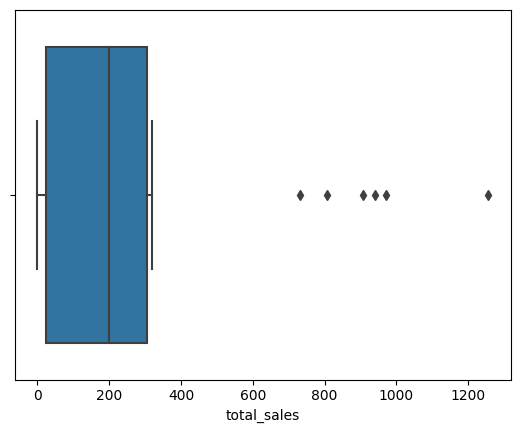

In [67]:
total_sales_by_platform_3 = videogames.groupby('platform')['total_sales'].sum().reset_index()
sns.boxplot(total_sales_by_platform_3['total_sales'])

#### Observaciones
El diagrama de caja nos muestra que la mayoría de las consolas experimentan un volumen total de ventas menor a los 300 millones de dólares estadounidenses. Sin embargo, existen casos puntuales de un extremos éxito de ventas, donde se presentan cantidades comprendidas entre los 700 a los 1200 millones.

### Estudio de relación entre reseñas y ventas
Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.


In [68]:
#Obtenemos el total de titulos por plataforma. El objetivo es elegir una consola con una cantidad elevada de titulos
videogames.groupby('platform')['name'].count().reset_index()

,platform,name
0,2600,133
1,3do,3
2,3ds,520
3,dc,52
4,ds,2151
5,gb,98
6,gba,822
7,gc,556
8,gen,29
9,gg,1


Elegiremos la consola PS2 para comenzar el estudio. El desarrollo se expone a continuación: 

#### Análisis - Play Station 2 (PS2)

In [69]:
print('Total de títulos:',videogames[(videogames['platform']=='ps2') & (videogames['user_score']!=-1)]['name'].count())
print('Cantidad de títulos con reseñas de usuarios:',videogames[(videogames['platform']=='ps2') & (videogames['user_score']==-1)]['name'].count())
ps2_set1 = videogames[(videogames['platform']=='ps2') & (videogames['user_score']!=-1) & (videogames['critic_score']!=-1)]

Total de títulos: 1241
Cantidad de títulos con reseñas de usuarios: 920


Coeficiente de correlación entre reseñas de los usuarios y las ventas: 0.16941987448591236


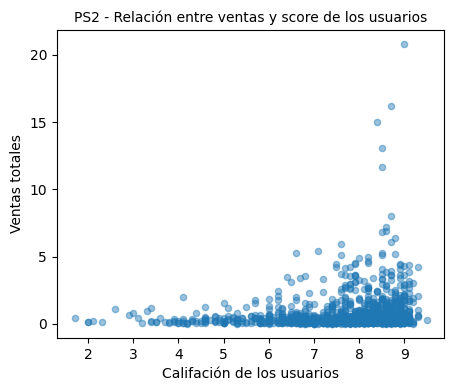

In [70]:
#Gráfica de dispersión de ventas totales respecto a calificación de los usuarios
print('Coeficiente de correlación entre reseñas de los usuarios y las ventas:', ps2_set1['user_score'].corr(ps2_set1['total_sales']))
ps2_set1.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.45, figsize=(5,4),
             ylabel='Ventas totales', xlabel='Califación de los usuarios')
plt.title('PS2 - Relación entre ventas y score de los usuarios', fontsize=10)
plt.show()

Coeficiente de correlación entre reseñas de crítica y las ventas: 0.3892195999178934


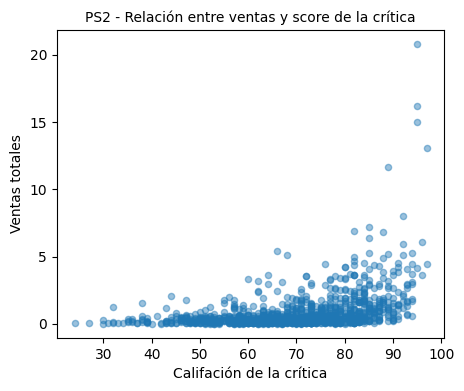

In [71]:
#Gráfica de dispersión de ventas totales respecto a calificación de la crítica
print('Coeficiente de correlación entre reseñas de crítica y las ventas:', ps2_set1['critic_score'].corr(ps2_set1['total_sales']))
ps2_set1.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.45, figsize=(5,4),
             ylabel='Ventas totales', xlabel='Califación de la crítica')
plt.title('PS2 - Relación entre ventas y score de la crítica', fontsize=10)
plt.show()

#### Análisis - Nintendo DS 

In [72]:
#Filtración del set
ds_set1 = videogames[(videogames['platform']=='ds') & (videogames['user_score']!=-1) & (videogames['critic_score']!=-1)]


Coeficiente de correlación entre reseñas de los usuarios y las ventas: 0.13945346537325198


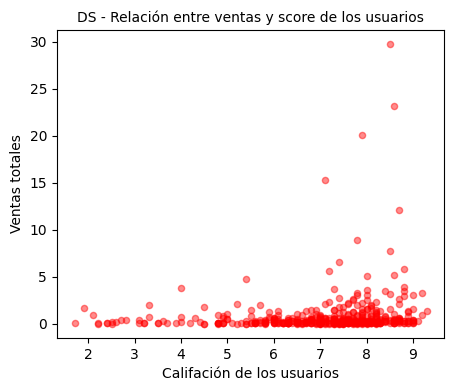

In [73]:
print('Coeficiente de correlación entre reseñas de los usuarios y las ventas:', ds_set1['user_score'].corr(ds_set1['total_sales']))
ds_set1.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.45, color='red', figsize=(5,4),
             ylabel='Ventas totales', xlabel='Califación de los usuarios')
plt.title('DS - Relación entre ventas y score de los usuarios', fontsize=10)
plt.show()

Coeficiente de correlación entre reseñas de crítica y las ventas: 0.230940511166079


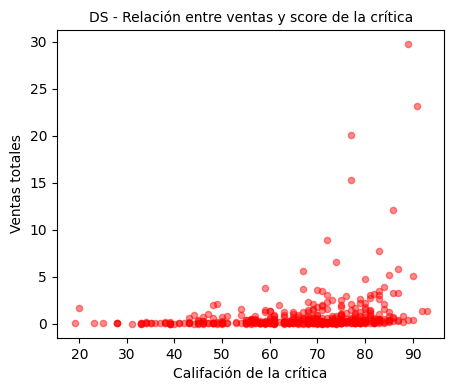

In [74]:
#Gráfica de dispersión de ventas totales respecto a calificación de la crítica
print('Coeficiente de correlación entre reseñas de crítica y las ventas:', ds_set1['critic_score'].corr(ds_set1['total_sales']))
ds_set1.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.45, color='red', figsize=(5,4),
             ylabel='Ventas totales', xlabel='Califación de la crítica')
plt.title('DS - Relación entre ventas y score de la crítica', fontsize=10)
plt.show()

#### Análisis - Playstation 3 (PS3)

Coeficiente de correlación entre reseñas de los usuarios y las ventas: 0.1426647022635119


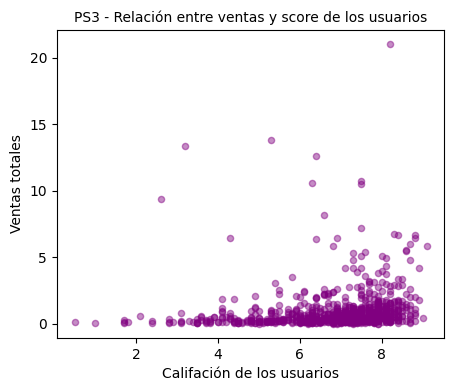

In [75]:
ps3_set1 = videogames[(videogames['platform']=='ps3') & (videogames['user_score']!=-1) & (videogames['critic_score']!=-1)]

print('Coeficiente de correlación entre reseñas de los usuarios y las ventas:', ps3_set1['user_score'].corr(ps3_set1['total_sales']))
ps3_set1.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.45, color='purple', figsize=(5,4),
             ylabel='Ventas totales', xlabel='Califación de los usuarios')
plt.title('PS3 - Relación entre ventas y score de los usuarios', fontsize=10)
plt.show()

Coeficiente de correlación entre reseñas de la crítica y las ventas: 0.4288311208151102


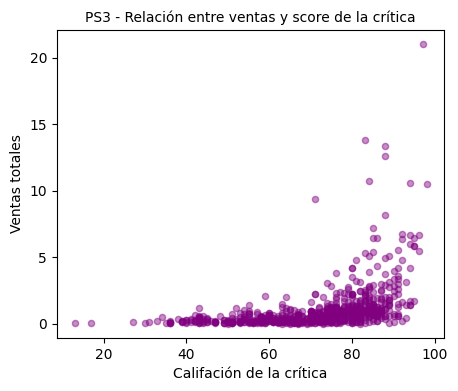

In [76]:
#Gráfica de dispersión de ventas totales respecto a calificación de la crítica
print('Coeficiente de correlación entre reseñas de la crítica y las ventas:', ps3_set1['critic_score'].corr(ps3_set1['total_sales']))
ps3_set1.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.45, color='purple', figsize=(5,4),
             ylabel='Ventas totales', xlabel='Califación de la crítica')
plt.title('PS3 - Relación entre ventas y score de la crítica', fontsize=10)
plt.show()

#### Análisis - Xbox 360 (X360)

Coeficiente de correlación entre reseñas de los usuarios y las ventas: 0.1104115038347283


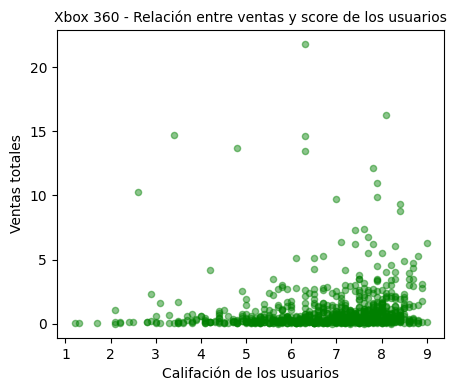

In [77]:
x360_set1 = videogames[(videogames['platform']=='x360') & (videogames['user_score']!=-1) & (videogames['critic_score']!=-1)]

print('Coeficiente de correlación entre reseñas de los usuarios y las ventas:', x360_set1['user_score'].corr(x360_set1['total_sales']))
x360_set1.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.45, color='green', figsize=(5,4),
             ylabel='Ventas totales', xlabel='Califación de los usuarios')
plt.title('Xbox 360 - Relación entre ventas y score de los usuarios', fontsize=10)
plt.show()

Coeficiente de correlación entre reseñas de la crítica y las ventas: 0.38951312357066675


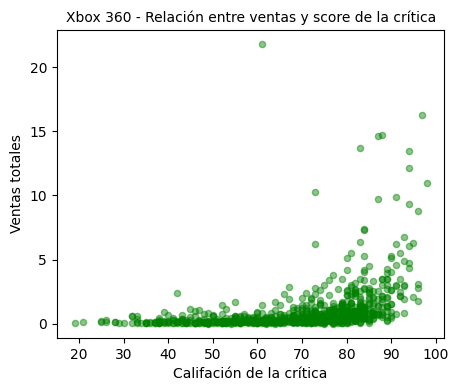

In [78]:
#Gráfica de dispersión de ventas totales respecto a calificación de la crítica
print('Coeficiente de correlación entre reseñas de la crítica y las ventas:', x360_set1['critic_score'].corr(x360_set1['total_sales']))
x360_set1.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.45, color='green', figsize=(5,4),
             ylabel='Ventas totales', xlabel='Califación de la crítica')
plt.title('Xbox 360 - Relación entre ventas y score de la crítica', fontsize=10)
plt.show()

In [79]:
videogames[(videogames['platform']=='x360') & (videogames['total_sales']>=20)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,kinect adventures!,x360,2010,misc,15.0,4.89,0.24,1.69,61,6.3,e,21.82


#### Observaciones
1. Se observa en general que tanto <b>califación de la crítica como de los usuarios no influyen significativamente en las ventas de un titulo</b>. 
2. Sin embargo, se observa también que, por regla general, los títulos con ventas altas poseen también una valoración alta entre los usuarios y la crítica. 
3. El punto anterior posee casos de excepciones notables, pese a que generalmente resulta cierto, ya que existen títulos que registran ventas muy elevadas pese a no contar con una valoración muy alta por la crítica o los usuarios. 
4. El caso más notable que expone el punto anterior corresponde al título <b>'Kinect Adventures!'</b>, lanzado para Xbox 360, ya que es el título con mayor ventas registradas para la consola, pese a no contar con calificaciones notables. El éxito del título puede deberse a que fue el primer juego que funcionaba con sensor Kinect de la consola, lo que puede sugerir que los títulos que añaden dínamicas novedosas de juego pueden resultar especialmente llamativos para los usuarios, lo que puede traducirse en ventas excepcionales. 

### Análisis de géneros más populares y/o rentables
Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [80]:
print(videogames['genre'].unique())

['sports' 'platform' 'racing' 'role-playing' 'puzzle' 'misc' 'shooter'
 'simulation' 'action' 'fighting' 'adventure' 'strategy' 'unknown']


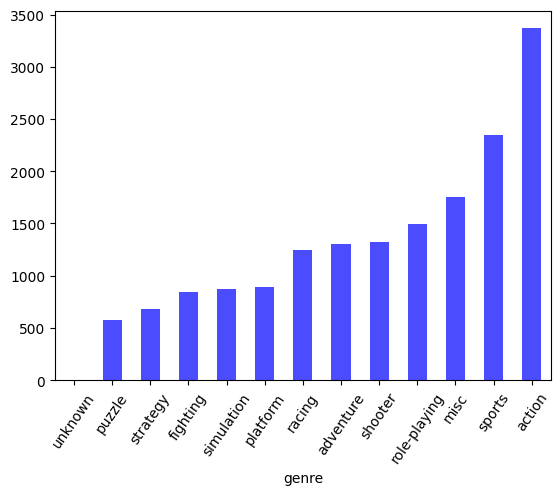

In [81]:
genre_count = videogames.groupby('genre')['name'].count().reset_index().sort_values(by='name')
genre_count.plot(kind='bar', x='genre', color='blue', alpha=0.7, rot=55, legend=False)

plt.show()

#### Observaciones
La tabla anterior nos muestra la cantidad de títulos de cada género disponibles. Comprobaremos si está cantidad de juegos se traduce en ventas. 

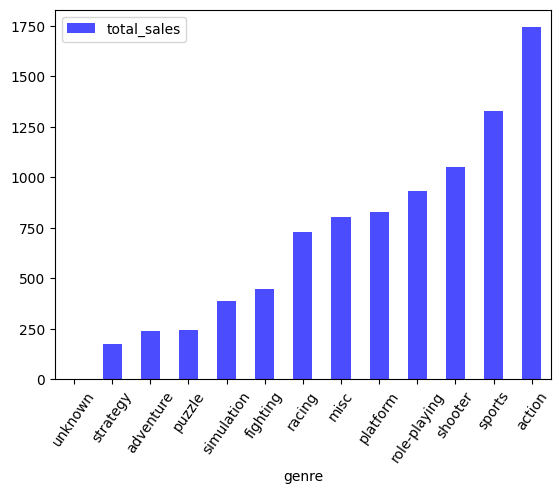

In [82]:
genre_count = videogames.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales')
genre_count.plot(kind='bar', x='genre', color='blue', alpha=0.7, rot=55)

plt.show()

#### Observaciones
1. Observamos que los géneros con mayor cantidad de juegos no siempre son los que registran mayores ventas, aunque ocurre con los géneros que encabezan la lista: acción y deportes. 
2. Los géneros que registran mayor número de ventas son, por mucho, los juegos de acción y deportes. Por otra parte, los géneros que resultan registrar menor número de ventas son los de estrategía y aventuras. 

## Perfiles de usuario por región

### Norteamérica (NA)

In [83]:
print('Top 5 Plataformas principales en la región de Norteamérica')
platforms_na = videogames.groupby('platform')['na_sales'].sum().reset_index()
platforms_na = platforms_na.sort_values(by='na_sales', ascending=False).reset_index().drop(columns='index')
na_platform_top5 = list(platforms_na.head(5)['platform'])
platforms_na.head(5)

Top 5 Plataformas principales en la región de Norteamérica


,platform,na_sales
0,x360,602.47
1,ps2,583.84
2,wii,496.90
3,ps3,393.49
4,ds,382.40


In [84]:
print('Top 5 Géneros principales en la región de Norteamérica - Géneros con más ventas')
genres_na = videogames.groupby('genre')['na_sales'].sum().reset_index()
genres_na = genres_na.sort_values(by='na_sales', ascending=False).reset_index().drop(columns='index')
na_genres = list(genres_na.head(5)['genre'])
genres_na.head(5)

Top 5 Géneros principales en la región de Norteamérica - Géneros con más ventas


,genre,na_sales
0,action,879.01
1,sports,684.43
2,shooter,592.24
3,platform,445.50
4,misc,407.27


In [85]:
videogames['rating'].unique()

array(['e', 'unknown', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

In [86]:
na_platform_rating_count = videogames.groupby(['platform','rating'])['na_sales'].sum().reset_index()
top5_platform_rating = na_platform_rating_count[na_platform_rating_count['platform'].isin(na_platform_top5)]
top5_platform_rating

,platform,rating,na_sales
11,ds,e,226.10
12,ds,e10+,48.89
13,ds,ec,0.61
14,ds,m,1.41
15,ds,t,16.98
16,ds,unknown,88.41
48,ps2,e,206.09
49,ps2,e10+,32.41
50,ps2,ec,0.12
51,ps2,m,103.55


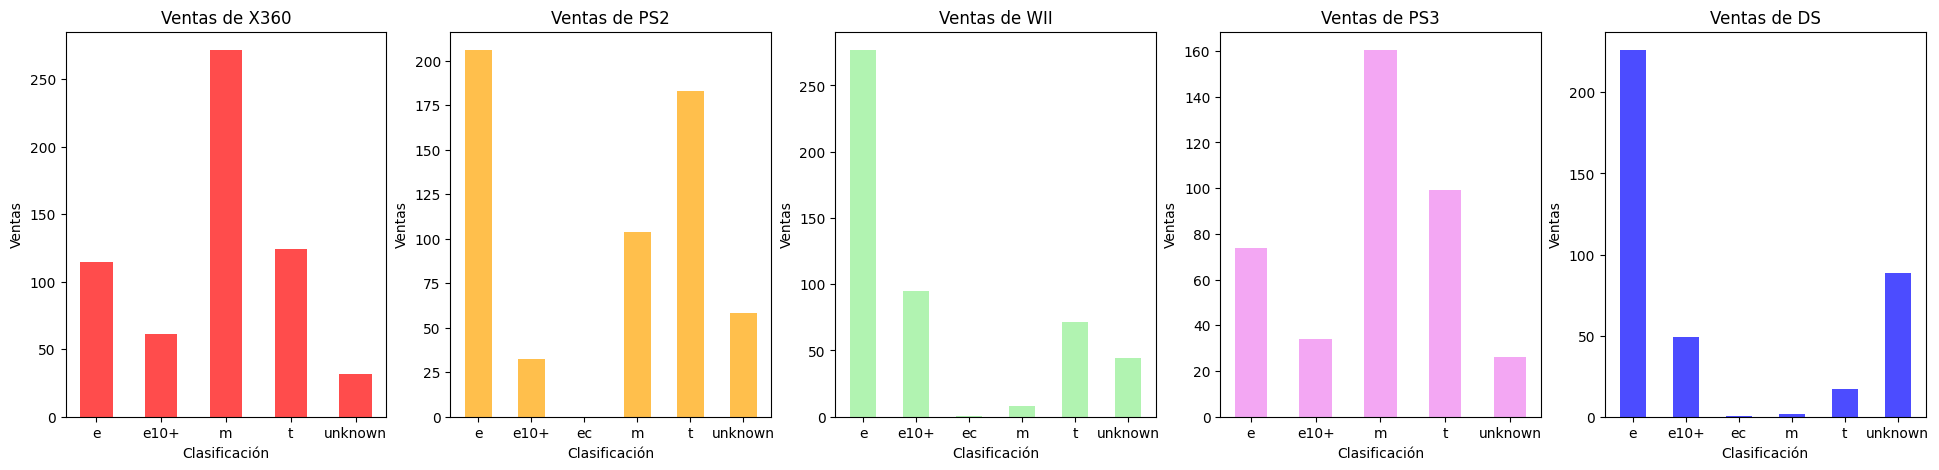

In [87]:
fig, ax = plt.subplots(1,5, figsize=(24,5))

na_platform_top5 = list(platforms_na.head(5)['platform'])
colors = ['red', 'orange', 'lightgreen', 'violet', 'blue']

for i in range(5):
    ax[i].bar(top5_platform_rating[top5_platform_rating['platform']==na_platform_top5[i]]['rating'],
              top5_platform_rating[top5_platform_rating['platform']==na_platform_top5[i]]['na_sales'],
              width=0.5, color=colors[i], alpha=0.7)
    ax[i].set(title=f'Ventas de {na_platform_top5[i].upper()}',
              xlabel='Clasificación',
              ylabel='Ventas')

plt.show()

 #### Observaciones de consolas más exitosas en Norteamérica
1. La consola Xbox 360 parece haber sido especialmente popular entre el público mayor de edad, aunque también muestra ventas significativas entre el público familiar y adolescente. 
2. El PS2 tenía un mercado bastante elevado enfocado en títulos dirigidos a todo el público (clasificación 'E'), ademas del público adolescente. 
3. El gran mercado del Nintendo Wii correspondió a títulos enfocados a todo público (clasificación 'E').
4. La plataforma PS3 fue muy popular entre el público con mayoría de edad. También registra ventas importantes de títulos para todo público  y adolescentes.
5. Al igual que el Nintendo Wii, la consola Nintendo DS registro mayoritariamente ventas de títulos enfocados a todo público (clasificación 'E').

In [88]:
genre_rating_count = videogames.groupby(['genre','rating'])['na_sales'].sum().reset_index()
na_top5_genre = genre_rating_count[genre_rating_count['genre'].isin(na_genres)].reset_index().drop(columns='index')
na_top5_genre

,genre,rating,na_sales
0,action,ao,1.26
1,action,e,112.28
2,action,e10+,120.09
3,action,ec,0.42
4,action,m,282.88
5,action,t,163.13
6,action,unknown,198.95
7,misc,e,153.75
8,misc,e10+,68.27
9,misc,ec,0.90


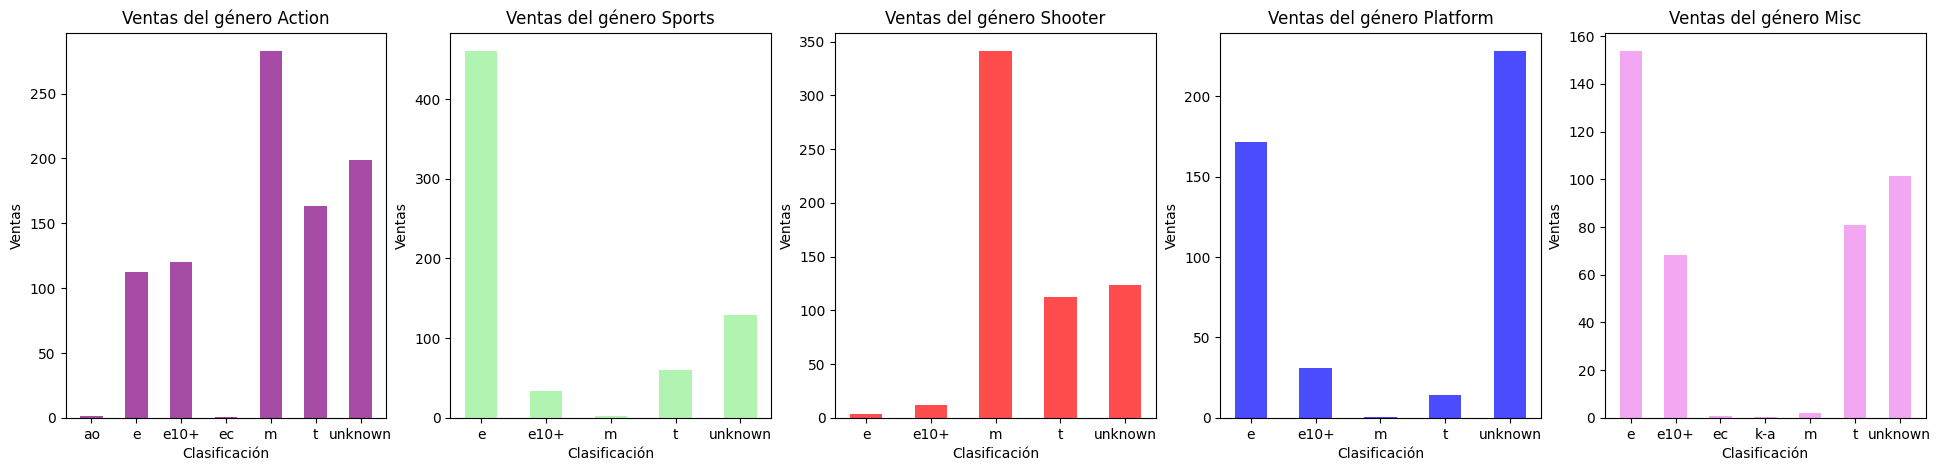

In [89]:
fig, ax = plt.subplots(1,5, figsize=(24,5))

na_genres_top5 = list(genres_na.head(5)['genre'])
colors = ['purple', 'lightgreen', 'red', 'blue', 'violet']

for i in range(5):
    ax[i].bar(na_top5_genre[na_top5_genre['genre']==na_genres_top5[i]]['rating'],
              na_top5_genre[na_top5_genre['genre']==na_genres_top5[i]]['na_sales'],
              width=0.5, color=colors[i], alpha=0.7)
    ax[i].set(title=f'Ventas del género {na_genres_top5[i].capitalize()}',
              xlabel='Clasificación',
              ylabel='Ventas')

plt.show()

#### Géneros más exitosos en Norteamérica
1. El público mayor de edad es el que consume más título del género de acción. 
2. Los juegos de temática de deportes son muy populares dentro de la clasificación para todo público.
3. El género 'Shooter' (disparos) está casi exclusivamente enfocado para el público mayor de edad y adolescentes.
4. 'Platform' es un juego con grandes ventas para todo público (clasificación 'E').
5. Los juegos de 'Misc' tienen presencia casi exclusivamente dentro de la clasificación 'E' (para todo público) y adolescentes. 

### Europa (EU)

In [90]:
print('Top 5 Plataformas principales en la región de Europa')
platforms_eu = videogames.groupby('platform')['eu_sales'].sum().reset_index()
platforms_eu = platforms_eu.sort_values(by='eu_sales', ascending=False).reset_index().drop(columns='index')
eu_platform_top5 = list(platforms_eu.head(5)['platform'])
platforms_eu.head(5)

Top 5 Plataformas principales en la región de Europa


,platform,eu_sales
0,ps2,339.29
1,ps3,330.28
2,x360,270.76
3,wii,262.21
4,ps,213.61


In [91]:
print('Top 5 Géneros principales en la región de Europa - Géneros con más ventas')
genres_eu = videogames.groupby('genre')['eu_sales'].sum().reset_index()
genres_eu = genres_eu.sort_values(by='eu_sales', ascending=False).reset_index().drop(columns='index')
eu_genres_list = list(genres_eu.head(5)['genre'])
genres_eu.head(5)

Top 5 Géneros principales en la región de Europa - Géneros con más ventas


,genre,eu_sales
0,action,519.13
1,sports,376.78
2,shooter,317.34
3,racing,236.51
4,misc,212.74


In [92]:
eu_platform_rating_count = videogames.groupby(['platform','rating'])['eu_sales'].sum().reset_index()
eu_top5_platform_df = eu_platform_rating_count[eu_platform_rating_count['platform'].isin(eu_platform_top5)]
eu_top5_platform_df

,platform,rating,eu_sales
43,ps,e,32.27
44,ps,k-a,0.16
45,ps,m,7.39
46,ps,t,36.60
47,ps,unknown,137.19
48,ps2,e,116.03
49,ps2,e10+,12.78
50,ps2,ec,0.09
51,ps2,m,55.65
52,ps2,t,107.27


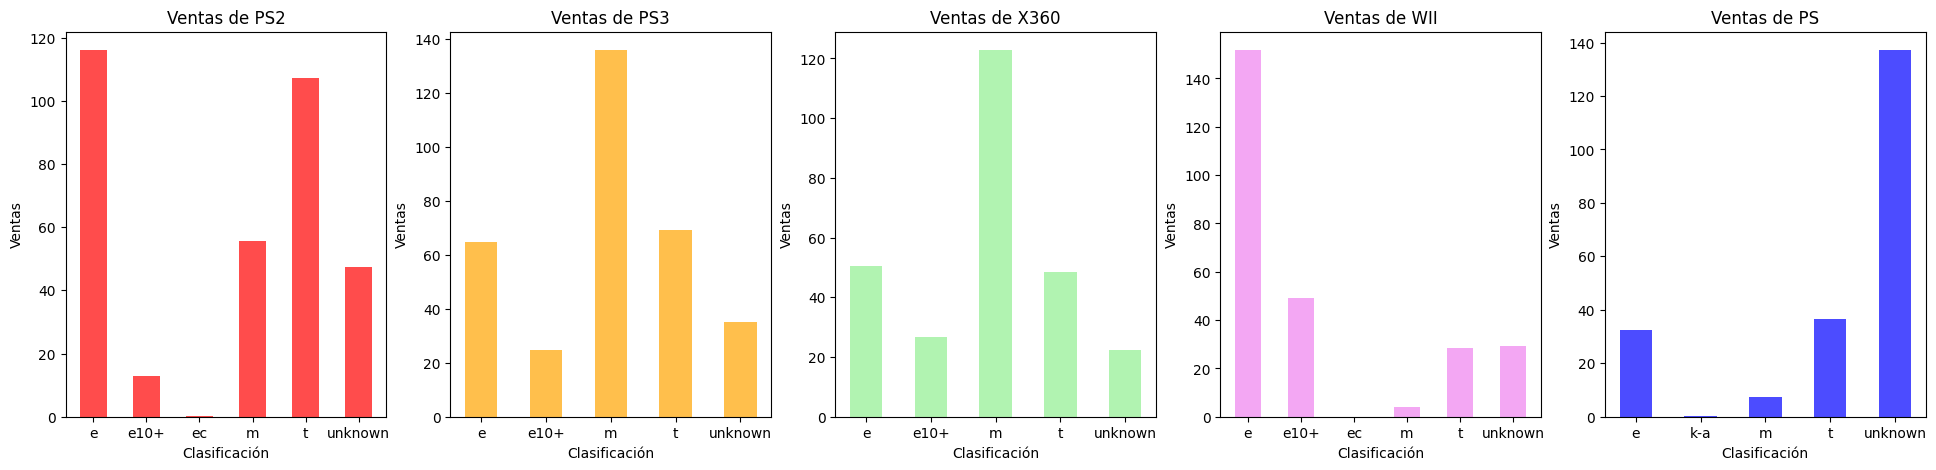

In [93]:
fig, ax = plt.subplots(1,5, figsize=(24,5))

eu_platform_top5 = list(platforms_eu.head(5)['platform'])
colors = ['red', 'orange', 'lightgreen', 'violet', 'blue']

for i in range(5):
    ax[i].bar(eu_top5_platform_df[eu_top5_platform_df['platform']==eu_platform_top5[i]]['rating'],
              eu_top5_platform_df[eu_top5_platform_df['platform']==eu_platform_top5[i]]['eu_sales'],
              width=0.5, color=colors[i], alpha=0.7)
    ax[i].set(title=f'Ventas de {eu_platform_top5[i].upper()}',
              xlabel='Clasificación',
              ylabel='Ventas')

plt.show()

#### Consolas más exitosas en Europa
1. PS2: Consola con ventas mayormente enfocadas en títulos para todo público y adolescente. 
2. PS3: los títulos de más éxito correspondian al público mayor de edad (clasificación 'M'). Sin embargo, también posee presencia en títulos para adolescentes y todo público. 
3. PS3: Los títulos de mayores ventas se enfocaban en el público mayor de edad
4. Wii: La consola presenta un enfoque en títulos para todo público. 
5. PS: Ventas de títulos mayormente enfocados para todo público y adolescentes. 

In [94]:
eu_genre_rating_count = videogames.groupby(['genre','rating'])['eu_sales'].sum().reset_index()
eu_top5_genres = eu_genre_rating_count[eu_genre_rating_count['genre'].isin(eu_genres_list)].reset_index().drop(columns='index')
eu_top5_genres

,genre,rating,eu_sales
0,action,ao,0.61
1,action,e,58.89
2,action,e10+,68.10
3,action,ec,0.00
4,action,m,199.09
5,action,t,104.38
6,action,unknown,88.06
7,misc,e,82.69
8,misc,e10+,33.85
9,misc,ec,0.00


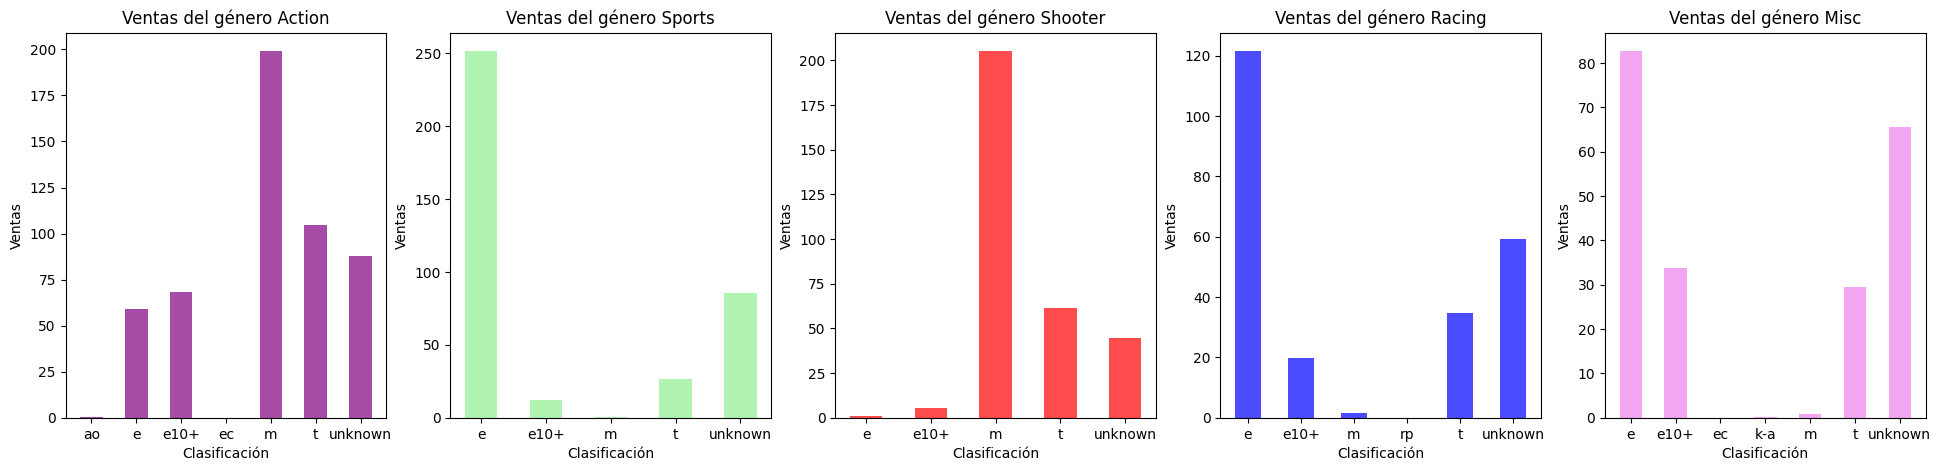

In [95]:
fig, ax = plt.subplots(1,5, figsize=(24,5))

eu_genres_top5 = list(genres_eu.head(5)['genre'])
colors = ['purple', 'lightgreen', 'red', 'blue', 'violet']

for i in range(5):
    ax[i].bar(eu_top5_genres[eu_top5_genres['genre']==eu_genres_top5[i]]['rating'],
              eu_top5_genres[eu_top5_genres['genre']==eu_genres_top5[i]]['eu_sales'],
              width=0.5, color=colors[i], alpha=0.7)
    ax[i].set(title=f'Ventas del género {eu_genres_top5[i].capitalize()}',
              xlabel='Clasificación',
              ylabel='Ventas')

plt.show()

#### Géneros más exitosos en Europa

1. Action: Principalmente popular en la categorias de mayores de edad y adolescentes.
2. Sports: Ventas enfocadas en títulos para todo público, presentando ventas significativas.
3. shooter: Los títulos muestran un gran énfasis en un público mayor de edad (clasificación 'M')
4. Racing: El género presenta un enfoque en títulos para todo público. 
5. Misc: Enfoque para todo publico y adolescentes, principalmente. 

### Japón (JP)

In [96]:
print('Top 5 Plataformas principales en la región de Japón')
platforms_jp = videogames.groupby('platform')['jp_sales'].sum().reset_index()
platforms_jp = platforms_jp.sort_values(by='jp_sales', ascending=False).reset_index().drop(columns='index')
jp_platform_top5 = list(platforms_jp.head(5)['platform'])
platforms_jp.head(5)

Top 5 Plataformas principales en la región de Japón


,platform,jp_sales
0,ds,175.57
1,ps,139.82
2,ps2,139.20
3,snes,116.55
4,3ds,100.67


In [97]:
print('Top 5 Géneros principales en la región de Japón - Géneros con más ventas')
genres_jp = videogames.groupby('genre')['jp_sales'].sum().reset_index()
genres_jp = genres_jp.sort_values(by='jp_sales', ascending=False).reset_index().drop(columns='index')
jp_genres_list = list(genres_jp.head(5)['genre'])
genres_jp.head(5)

Top 5 Géneros principales en la región de Japón - Géneros con más ventas


,genre,jp_sales
0,role-playing,355.41
1,action,161.43
2,sports,135.54
3,platform,130.83
4,misc,108.11


In [98]:
jp_platform_rating_count = videogames.groupby(['platform','rating'])['jp_sales'].sum().reset_index()
top5_platforms_jp_df = jp_platform_rating_count[jp_platform_rating_count['platform'].isin(jp_platform_top5)]
top5_platforms_jp_df

,platform,rating,jp_sales
2,3ds,e,21.80
3,3ds,e10+,4.53
4,3ds,m,1.62
5,3ds,t,6.99
6,3ds,unknown,65.73
11,ds,e,60.29
12,ds,e10+,20.87
13,ds,ec,0.00
14,ds,m,0.30
15,ds,t,5.90


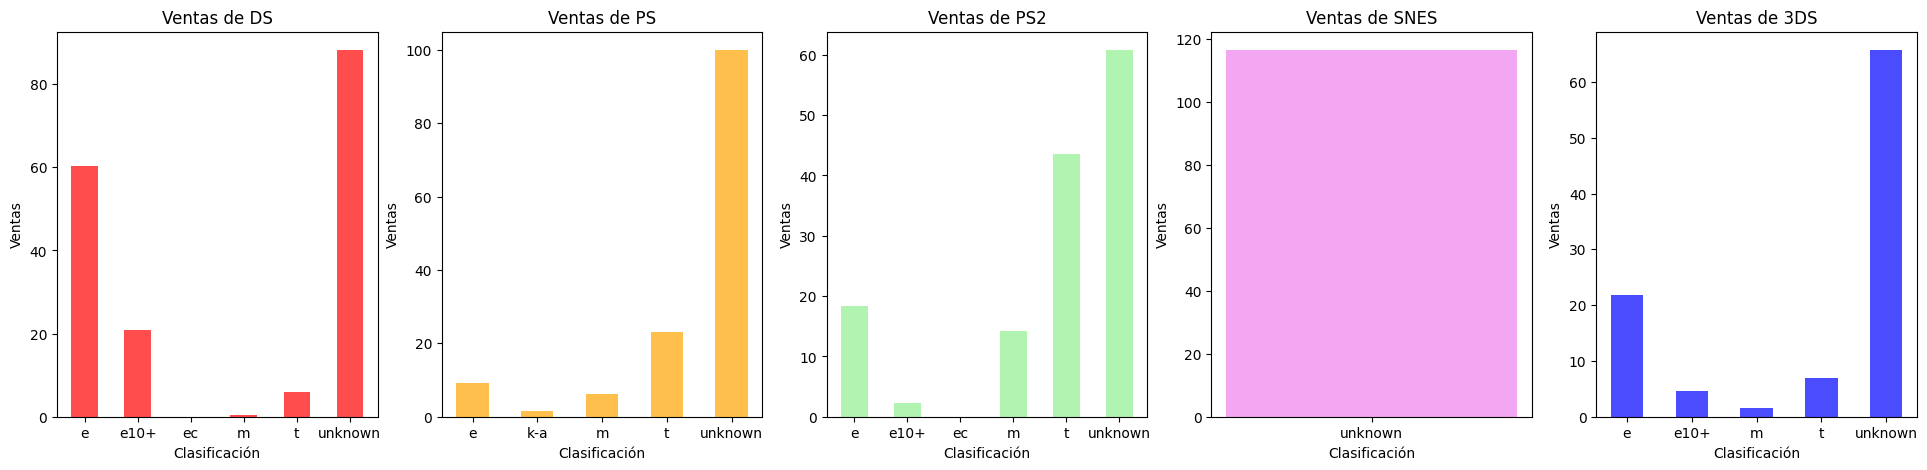

In [99]:
fig, ax = plt.subplots(1,5, figsize=(24,5))

jp_platform_top5 = list(platforms_jp.head(5)['platform'])
colors = ['red', 'orange', 'lightgreen', 'violet', 'blue']

for i in range(5):
    ax[i].bar(top5_platforms_jp_df[top5_platforms_jp_df['platform']==jp_platform_top5[i]]['rating'],
              top5_platforms_jp_df[top5_platforms_jp_df['platform']==jp_platform_top5[i]]['jp_sales'],
              width=0.5, color=colors[i], alpha=0.7)
    ax[i].set(title=f'Ventas de {jp_platform_top5[i].upper()}',
              xlabel='Clasificación',
              ylabel='Ventas')

plt.show()

#### Consolas más exitosas en Europa
1. DS: Consola con gran éxito en títulos para todo público. 
2. PS: Su mercado de mas éxito se encuentra en títulos para adolescentes, aunque también posee presencia en clasificación para todas las edades (E)
3. PS2: Principalmente con títulos de calsificación para adolescentes en adelante. Los títulos para mayores de edad y clasificación 'E' también presentan ventas significativas.
4. SNES: La clasificación de títulos para SNES es mayoritariamente desconocida. Debido a la época, posiblemente muchos de los títulos aún no podian establecerse en una categoría en particular. 
5. 3DS: Ventas de títulos mayormente enfocados para todo público y adolescentes. 

In [100]:
jp_genre_rating_count = videogames.groupby(['genre','rating'])['jp_sales'].sum().reset_index()
jp_top5_genres_df = jp_genre_rating_count[jp_genre_rating_count['genre'].isin(jp_genres_list)].reset_index().drop(columns='index')
jp_top5_genres_df

,genre,rating,jp_sales
0,action,ao,0.00
1,action,e,10.44
2,action,e10+,3.99
3,action,ec,0.00
4,action,m,36.95
5,action,t,29.46
6,action,unknown,80.59
7,misc,e,28.99
8,misc,e10+,1.78
9,misc,ec,0.00


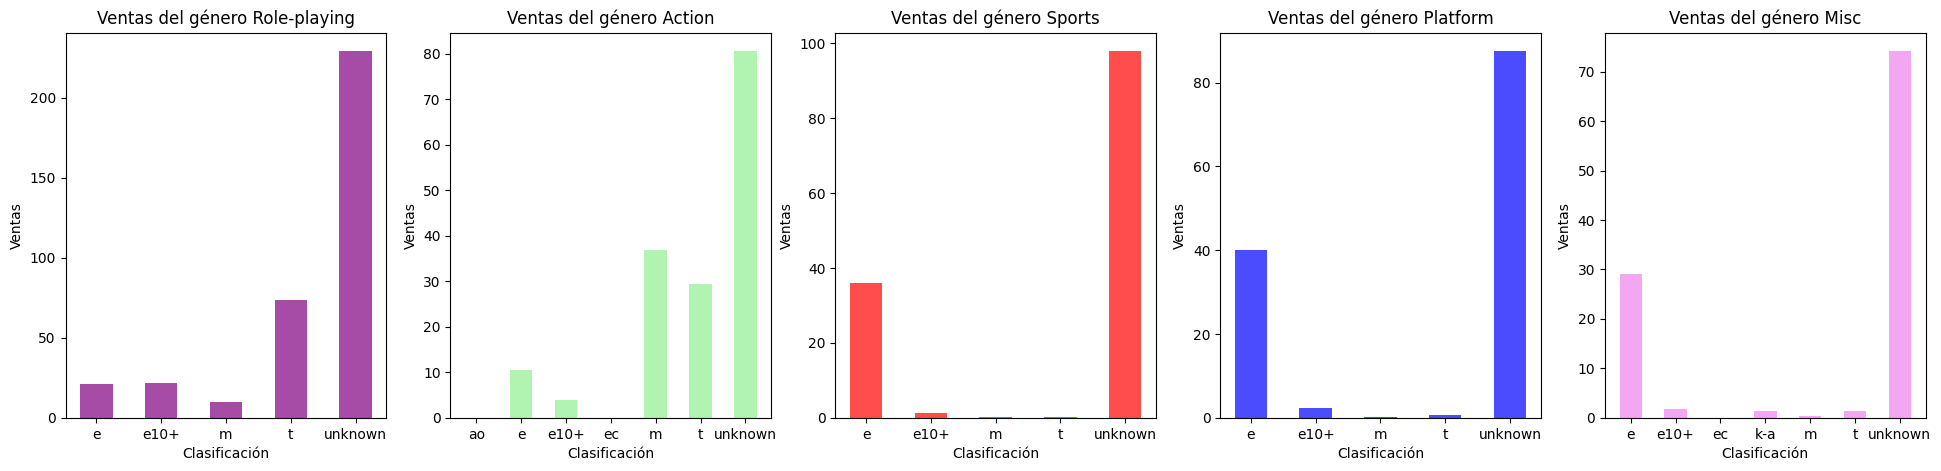

In [101]:
fig, ax = plt.subplots(1,5, figsize=(24,5))

jp_genres_top5 = list(genres_jp.head(5).head(5)['genre'])
colors = ['purple', 'lightgreen', 'red', 'blue', 'violet']

for i in range(5):
    ax[i].bar(jp_top5_genres_df[jp_top5_genres_df['genre']==jp_genres_top5[i]]['rating'],
              jp_top5_genres_df[jp_top5_genres_df['genre']==jp_genres_top5[i]]['jp_sales'],
              width=0.5, color=colors[i], alpha=0.7)
    ax[i].set(title=f'Ventas del género {jp_genres_top5[i].capitalize()}',
              xlabel='Clasificación',
              ylabel='Ventas')

plt.show()

#### Géneros más exitosos en Japón
Anotación: Por cuestiones desconocidas, se registra una gran cantidad de falta de información respecto a la calsificación de títulos en Japón. En un entorno real, seria posible consultar las causas de esta situación e intentar obtener información adicional de fuentes alternas, ya que nuestra finalidad es obtener información fiable. Los resultados y/o conlusiones obtenidas deben tener en consideración este aspecto.
1. Role PLaying: Popular principalmente entre adolescentes 
2. Action: El principal público de los títulos de este genero corresponde a adolescentes y adultos. 
3. Sports: Populares para todo público.
4. Platform: Registran ventas significativas en categoria para todas las edades. 
5. Misc: Los títulos de mayor venta corresponden a clasficación para todas las edades (cclasificación 'E').

## Pruebas de hipótesis estadísticas

### Hipótesis 1
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.<br>
1. Hipótesis Nula (H0): La media de las calificaciones de usuarios de Xbox One y PC son semejantes.
2. Hipótesis Alternativa (H1): La media de las calificaciones de usuarios de Xbox One y PC son diferentes. 

Media de la calificación de usuarios de Xbox:	 6.521428571428572
Varianza de la calificación de usuarios de Xbox	: 1.9069968429360695

Media de la calificación de usuarios de PC:	 7.062467532467533
Varianza de la calificación de usuarios de PC:	 2.3407871413372066


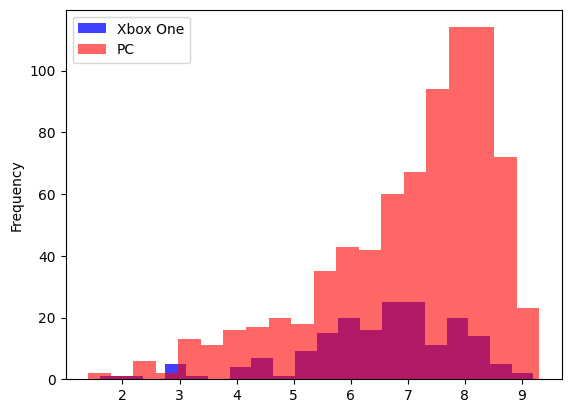

In [102]:
xbox_user_score = videogames[(videogames['platform']=='xone') & (videogames['user_score']!=-1)].reset_index()
xbox_user_score['user_score'].plot(kind='hist', bins=20, alpha=0.75, color='blue')
print('Media de la calificación de usuarios de Xbox:\t', xbox_user_score['user_score'].mean())
print('Varianza de la calificación de usuarios de Xbox\t:', xbox_user_score['user_score'].var())
pc_user_score = videogames[(videogames['platform']=='pc') & (videogames['user_score']!=-1)].reset_index()
pc_user_score['user_score'].plot(kind='hist', bins=20, alpha=0.6, color='red')
print('\nMedia de la calificación de usuarios de PC:\t', pc_user_score['user_score'].mean())
print('Varianza de la calificación de usuarios de PC:\t', pc_user_score['user_score'].var())
plt.legend(['Xbox One','PC'])
plt.show()

In [103]:
videogames['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [113]:
# Prueba de Levene (confirmación de similitud de varianza)
alpha_levene = 0.05
leven_results = st.levene(xbox_user_score['user_score'], pc_user_score['user_score'])
print('Valor p (levene):', leven_results.pvalue)

if leven_results.pvalue < alpha_levene:
    print("Rechazamos la hipótesis nula: las varianzas no son iguales.")

else:
    print("No podemos rechazar la hipótesis nula. Las varianzas son probablemente parecidas.")

Valor p (levene): 0.2693951512047048
No podemos rechazar la hipótesis nula. Las varianzas son probablemente parecidas


Ya que no hemos podido rechazar la hipótesis nula a través del test de Levene, establecemos el valor de <b>'equals_var'</b> igual <b>'True'</b>.

In [114]:
# Prueba de hipotesis

alpha = 0.05
results = st.ttest_ind(xbox_user_score['user_score'], pc_user_score['user_score'], equal_var=True) 
print('Valor p: ', results.pvalue) 

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")

else:
    print("No podemos rechazar la hipótesis nula")

Valor p:  1.3896435533548819e-05
Rechazamos la hipótesis nula


<b>Conclusiones:</b> Ya que la hipótesis nula fue rechazada, se deduce que las medias de las calificaciones de PC y Xbox One presentan diferencias significativas. 

### Hipótesis 2
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
1. Hipótesis Nula (H0): La media de las calificaciones de los usuarios para los géneros 'Acción' y 'Deportes' son semejantes.
2. Hipótesis Alternativa (H1): La media de las calificaciones de usuarios para los géneros 'Acción' y 'Deportes' son son diferentes. 

Media de la calificación del género "Sports":	 6.962522686025407
Varianza de la calificación del género "Sports"	: 2.596932049893596

Media de la calificación del género "Acción":	 7.054043715846995
Varianza de la calificación del género "Acción":	 2.031746898033205


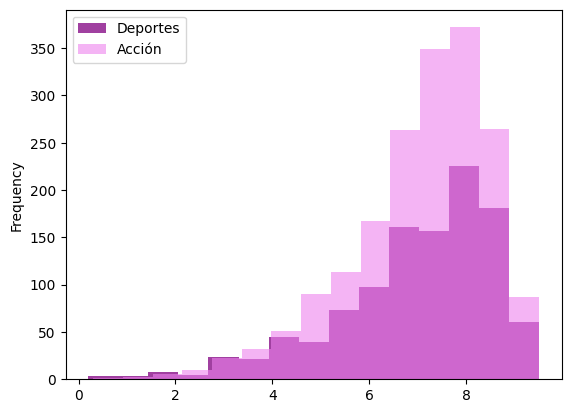

In [105]:
sports_user_score = videogames[(videogames['genre']=='sports') & (videogames['user_score']!=-1)].reset_index()
sports_user_score['user_score'].plot(kind='hist', bins=15, alpha=0.75, color='purple')
print('Media de la calificación del género "Sports":\t', sports_user_score['user_score'].mean())
print('Varianza de la calificación del género "Sports"\t:', sports_user_score['user_score'].var())
action_user_score = videogames[(videogames['genre']=='action') & (videogames['user_score']!=-1)].reset_index()
action_user_score['user_score'].plot(kind='hist', bins=15, alpha=0.6, color='violet')
print('\nMedia de la calificación del género "Acción":\t', action_user_score['user_score'].mean())
print('Varianza de la calificación del género "Acción":\t', action_user_score['user_score'].var())
plt.legend(['Deportes','Acción'])
plt.show()

In [111]:
# Prueba de Levene (confirmación de similitud de varianza)
alpha_levene = 0.05
leven_results = st.levene(sports_user_score['user_score'], action_user_score['user_score'])
print('Valor p (levene):', leven_results.pvalue)

if leven_results.pvalue < alpha_levene:
    print("Rechazamos la hipótesis nula: las varianzas no son iguales")

else:
    print("No podemos rechazar la hipótesis nula. Las varianzas son probablemente parecidas")

Valor p (levene): 0.00018557225393395747
Rechazamos la hipótesis nula: las varianzas no son iguales


A través de la prueba de Levene, hemos comprobado que las varianzas no son iguales, por lo que continuaremos establaciendo el valor de <b>'equal_var'</b> igual a <b>'False'</b>.

In [112]:
# Prueba de hipotesis

alpha = 0.05
results = st.ttest_ind(sports_user_score['user_score'], action_user_score['user_score'], equal_var=False) 
print('Valor p: ', results.pvalue) 

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")

else:
    print("No podemos rechazar la hipótesis nula")

Valor p:  0.12024530426190531
No podemos rechazar la hipótesis nula


<b>Conclusiones:</b> Ya que la hipótesis nula no pueder ser rechazada, inferimos que las calificaciones de usuarios para los generos de deportes y acción parecen ser semejantes. 

## Conclusiones Generales

1. Para completar datos de años faltantes, es posible consultar fuentes adicionales (proxys, API's, Bases de datos, etc.). En ocasiones, dependiendo del contexto del proyecto, es posible obtener estos datos del mismo dataframe, ya que un mismo título es lanzado en diferentes consolas. 

2. <b>El periodo comprendido entre los años 2005 y 2011 es en el que se presentó un mayor número de lanzamientos de títulos de videojuegos</b>. Después de dicho periodo se observa una tendencia más reducida, pero estable. 

3. Con base en las observaciones obtenidas, es posible inferir que <b>el periodo de popularidad de una consola comprende cerca de 10 años </b>(9.5 de acuerdo al promedio considerado). En dicho periodo, la consola en cuestión cuenta con ventas significativas de títulos exitosos. 

4. Generalmente, parece observarse que <b>el año en que una consola registra su mayor volumen de ventas corresponde al cuarto o quinto año desde su aparición en las listas de popularidad</b>.<br>

5. <b>Las 2 dos consolas mas prometedoras para el año 2017 son el PS4 y el Xbox One.</b> Ambas se encuentran en lo que podriamos denominar su "periodo de éxito", que estimamos corresponde al 4to o 5to años después del lanzamiento de la consola. 

6. Las consolas de Nintendo (la 3DS y la Wii U) también presentan un periodo de éxito considerable, pero significativamente menor que el mostrado por la PS4 y la Xbox One. 

7. De los dos puntos anteriores puede inferirse que <b>una campaña publicitaria dirigida hacia a las 4 consolas mencionadas (PS4, Xbox One, Wii U y 3DS) es potencialmente exitosa</b>, principalmente para las consolas PS4 y Xbox One, que encabezan las listas de ventas en el año 2016. 

8. Por regla general, se observa que <b>la calificación de la crítica y de los usuarios no influye notablemente en las ventas de un título en particular</b>. Sin embargo, tambien resulta notable el hecho de que, por regla general, un título con ventas elevadas suele tener calificaciones altas entre la crítica especializada y los usuarios. 

9. Se observan excepciones al punto anterior en casos particulares. Por ejemplo, el título <b>"Kinect Adventures!"</b> para Xbox 360 es el juego más exitoso en la historia de la consola, pese a tener calificaciones no muy elevadas. Destaca el hecho de ser el primer juego en usar el aditamento conocido como 'Kinect'. Este hecho sugiere que <b>el lanzamiento de dinámicas o accesorios novedosos en los juegos puede generar un efecto significativo en las ventas que genera.</b> 

10. <b>Los géneros que registran mayor número de ventas son, por mucho, los juegos de acción y deportes.</b> Por otra parte, los géneros aparentemente menos exitosos son los de estrategía y aventuras. 

11. <b>Se observan diferentes preferencias de compra en los 3 principales mercados estudiados (Norteamérica, Europa y Japón).</b> Teniendo en cuenta estos aspectos, toda campaña publicitaria enfocada en una región en particular debe considerar las preferencias identificadas en cada mercado. 

12. <b>Las pruebas de Levene son de mucha ayuda para determinar si la varianza de diferentes conjuntos de datos puede considerarse equivalente</b>. 

13. De acuerdo al análisis estadístico realizado, se deduce que </b>las medias de las calificaciones de títulos de PC y Xbox One presentan diferencias significativas</b>. 

14. De igual forma, y con base al análisis realizado, <b>inferimos que las calificaciones de usuarios para los géneros de deportes y acción parecen ser semejantes.</b>

